In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="Set2")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold, f_classif
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load train and test datasets
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

In [3]:
# Find shape 
print("Train dataset shape:", train_df.shape)
print("Test dataset shape :", test_df.shape)

Train dataset shape: (59598, 24)
Test dataset shape : (14900, 24)


In [4]:
# View first 5 rows of train and test
print("Train dataset head:")
display(train_df.head())

print("\nTest dataset head:")
display(test_df.head())

Train dataset head:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed



Test dataset head:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [5]:
# Basic info about datasets
print("Train dataset info:")
train_df.info()

print("\nTest dataset info:")
test_df.info()

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Nu

In [6]:
# Statistical summary
print("Train dataset summary:")
display(train_df.describe(include='all'))

print("Test dataset summary:")
display(test_df.describe(include='all'))

Train dataset summary:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,59598.000000,59598.000000,59598,59598.000000,59598,59598.000000,59598,59598,59598,59598.000000,...,59598.000000,59598,59598,59598.000000,59598,59598,59598,59598,59598,59598
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Entry,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,32739,NaN,15507,NaN,22528,29779,35810,NaN,...,NaN,23867,29745,NaN,48239,56680,49895,29766,23758,31260
mean,37227.118729,38.565875,NaN,15.753901,NaN,7302.397983,NaN,NaN,NaN,0.832578,...,1.648075,NaN,NaN,55.758415,NaN,NaN,NaN,NaN,NaN,NaN
std,21519.150028,12.079673,NaN,11.245981,NaN,2151.457423,NaN,NaN,NaN,0.994991,...,1.555689,NaN,NaN,25.411090,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,18.000000,NaN,1.000000,NaN,1316.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18580.250000,28.000000,NaN,7.000000,NaN,5658.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37209.500000,39.000000,NaN,13.000000,NaN,7354.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55876.750000,49.000000,NaN,23.000000,NaN,8880.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN


Test dataset summary:


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,14900.000000,14900.000000,14900,14900.000000,14900,14900.000000,14900,14900,14900,14900.000000,...,14900.000000,14900,14900,14900.000000,14900,14900,14900,14900,14900,14900
unique,NaN,NaN,2,NaN,5,NaN,4,4,4,NaN,...,NaN,3,3,NaN,2,2,2,4,4,2
top,NaN,NaN,Male,NaN,Technology,NaN,Good,High,Average,NaN,...,NaN,Mid,Medium,NaN,No,No,No,Good,Low,Stayed
freq,NaN,NaN,8087,NaN,3815,NaN,5630,7466,8909,NaN,...,NaN,5925,7486,NaN,12061,14165,12499,7416,5862,7868
mean,37339.022081,38.385235,NaN,15.592416,NaN,7287.306040,NaN,NaN,NaN,0.834362,...,1.659329,NaN,NaN,55.603624,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.129293,12.097904,NaN,11.133792,NaN,2156.737934,NaN,NaN,NaN,0.996511,...,1.545401,NaN,NaN,25.352807,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,18.000000,NaN,1.000000,NaN,1226.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,18825.500000,28.000000,NaN,7.000000,NaN,5633.750000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,37433.000000,38.000000,NaN,13.000000,NaN,7332.000000,NaN,NaN,NaN,1.000000,...,1.000000,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,55857.500000,49.000000,NaN,23.000000,NaN,8852.000000,NaN,NaN,NaN,2.000000,...,3.000000,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Missing values check
print("Missing values in train set:")
print(train_df.isnull().sum())

print("\nMissing values in test set:")
print(test_df.isnull().sum())

Missing values in train set:
Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Missing values in test set:
Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0

In [8]:
# Identify categorical and numerical features of train dataset
num_features  = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features  = train_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

Numerical Features: ['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
Categorical Features: ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']


In [9]:
# Check target variable distribution
print("Attrition Value Counts:")
print(train_df['Attrition'].value_counts())
print("\nAttrition Distribution (%):")
print(train_df['Attrition'].value_counts(normalize=True) * 100)

Attrition Value Counts:
Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

Attrition Distribution (%):
Attrition
Stayed    52.451425
Left      47.548575
Name: proportion, dtype: float64


# Exploratory Data Analysis

## Distribution of Attrition

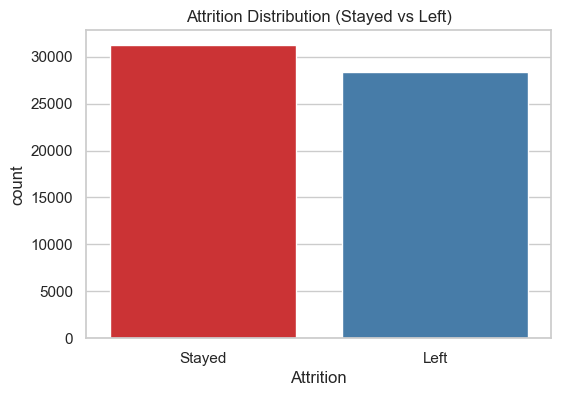

Attrition Counts:
Attrition
Stayed    31260
Left      28338
Name: count, dtype: int64

Attrition Percentage:
Attrition
Stayed    52.451425
Left      47.548575
Name: proportion, dtype: float64


In [10]:
# Check distribution of Attrition
plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Attrition", hue="Attrition", palette="Set1", legend=False)
plt.title("Attrition Distribution (Stayed vs Left)")
plt.show()

print("Attrition Counts:")
print(train_df["Attrition"].value_counts())
print("\nAttrition Percentage:")
print(train_df["Attrition"].value_counts(normalize=True) * 100)

## Univariate Analysis

### Histogram for Numerical features

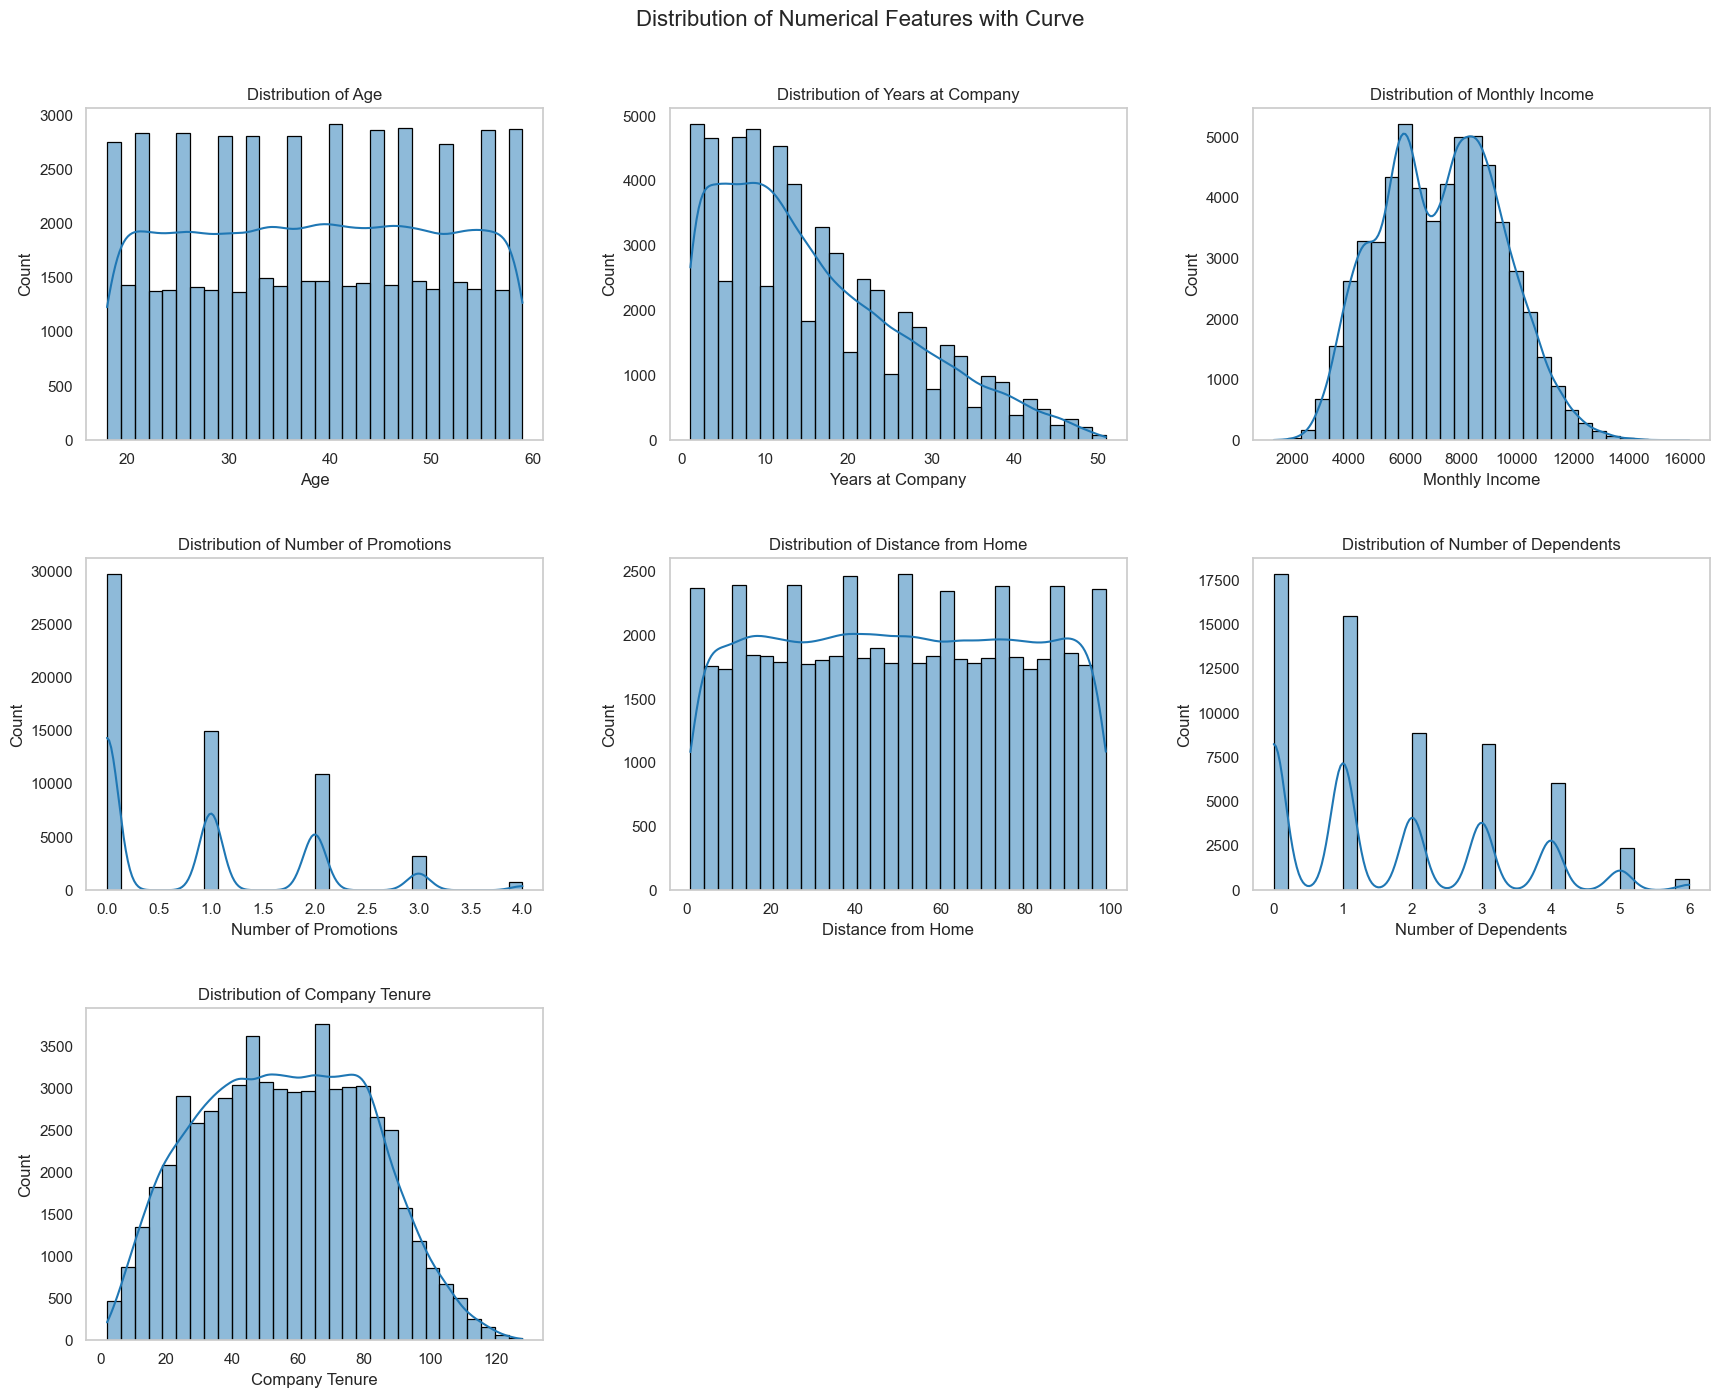

In [11]:
# Histograms for numerical features
num_features = ['Age', 'Years at Company', 'Monthly Income', 
                'Number of Promotions', 'Distance from Home', 
                'Number of Dependents', 'Company Tenure']

plt.figure(figsize=(18, 14)) 
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(train_df[col], bins=30, kde=True, edgecolor="black", color="tab:blue")
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.grid(False)

plt.tight_layout(pad=3)
plt.suptitle("Distribution of Numerical Features with Curve", fontsize=16, y=1.02)
plt.show()


### Barplot for Categorical features

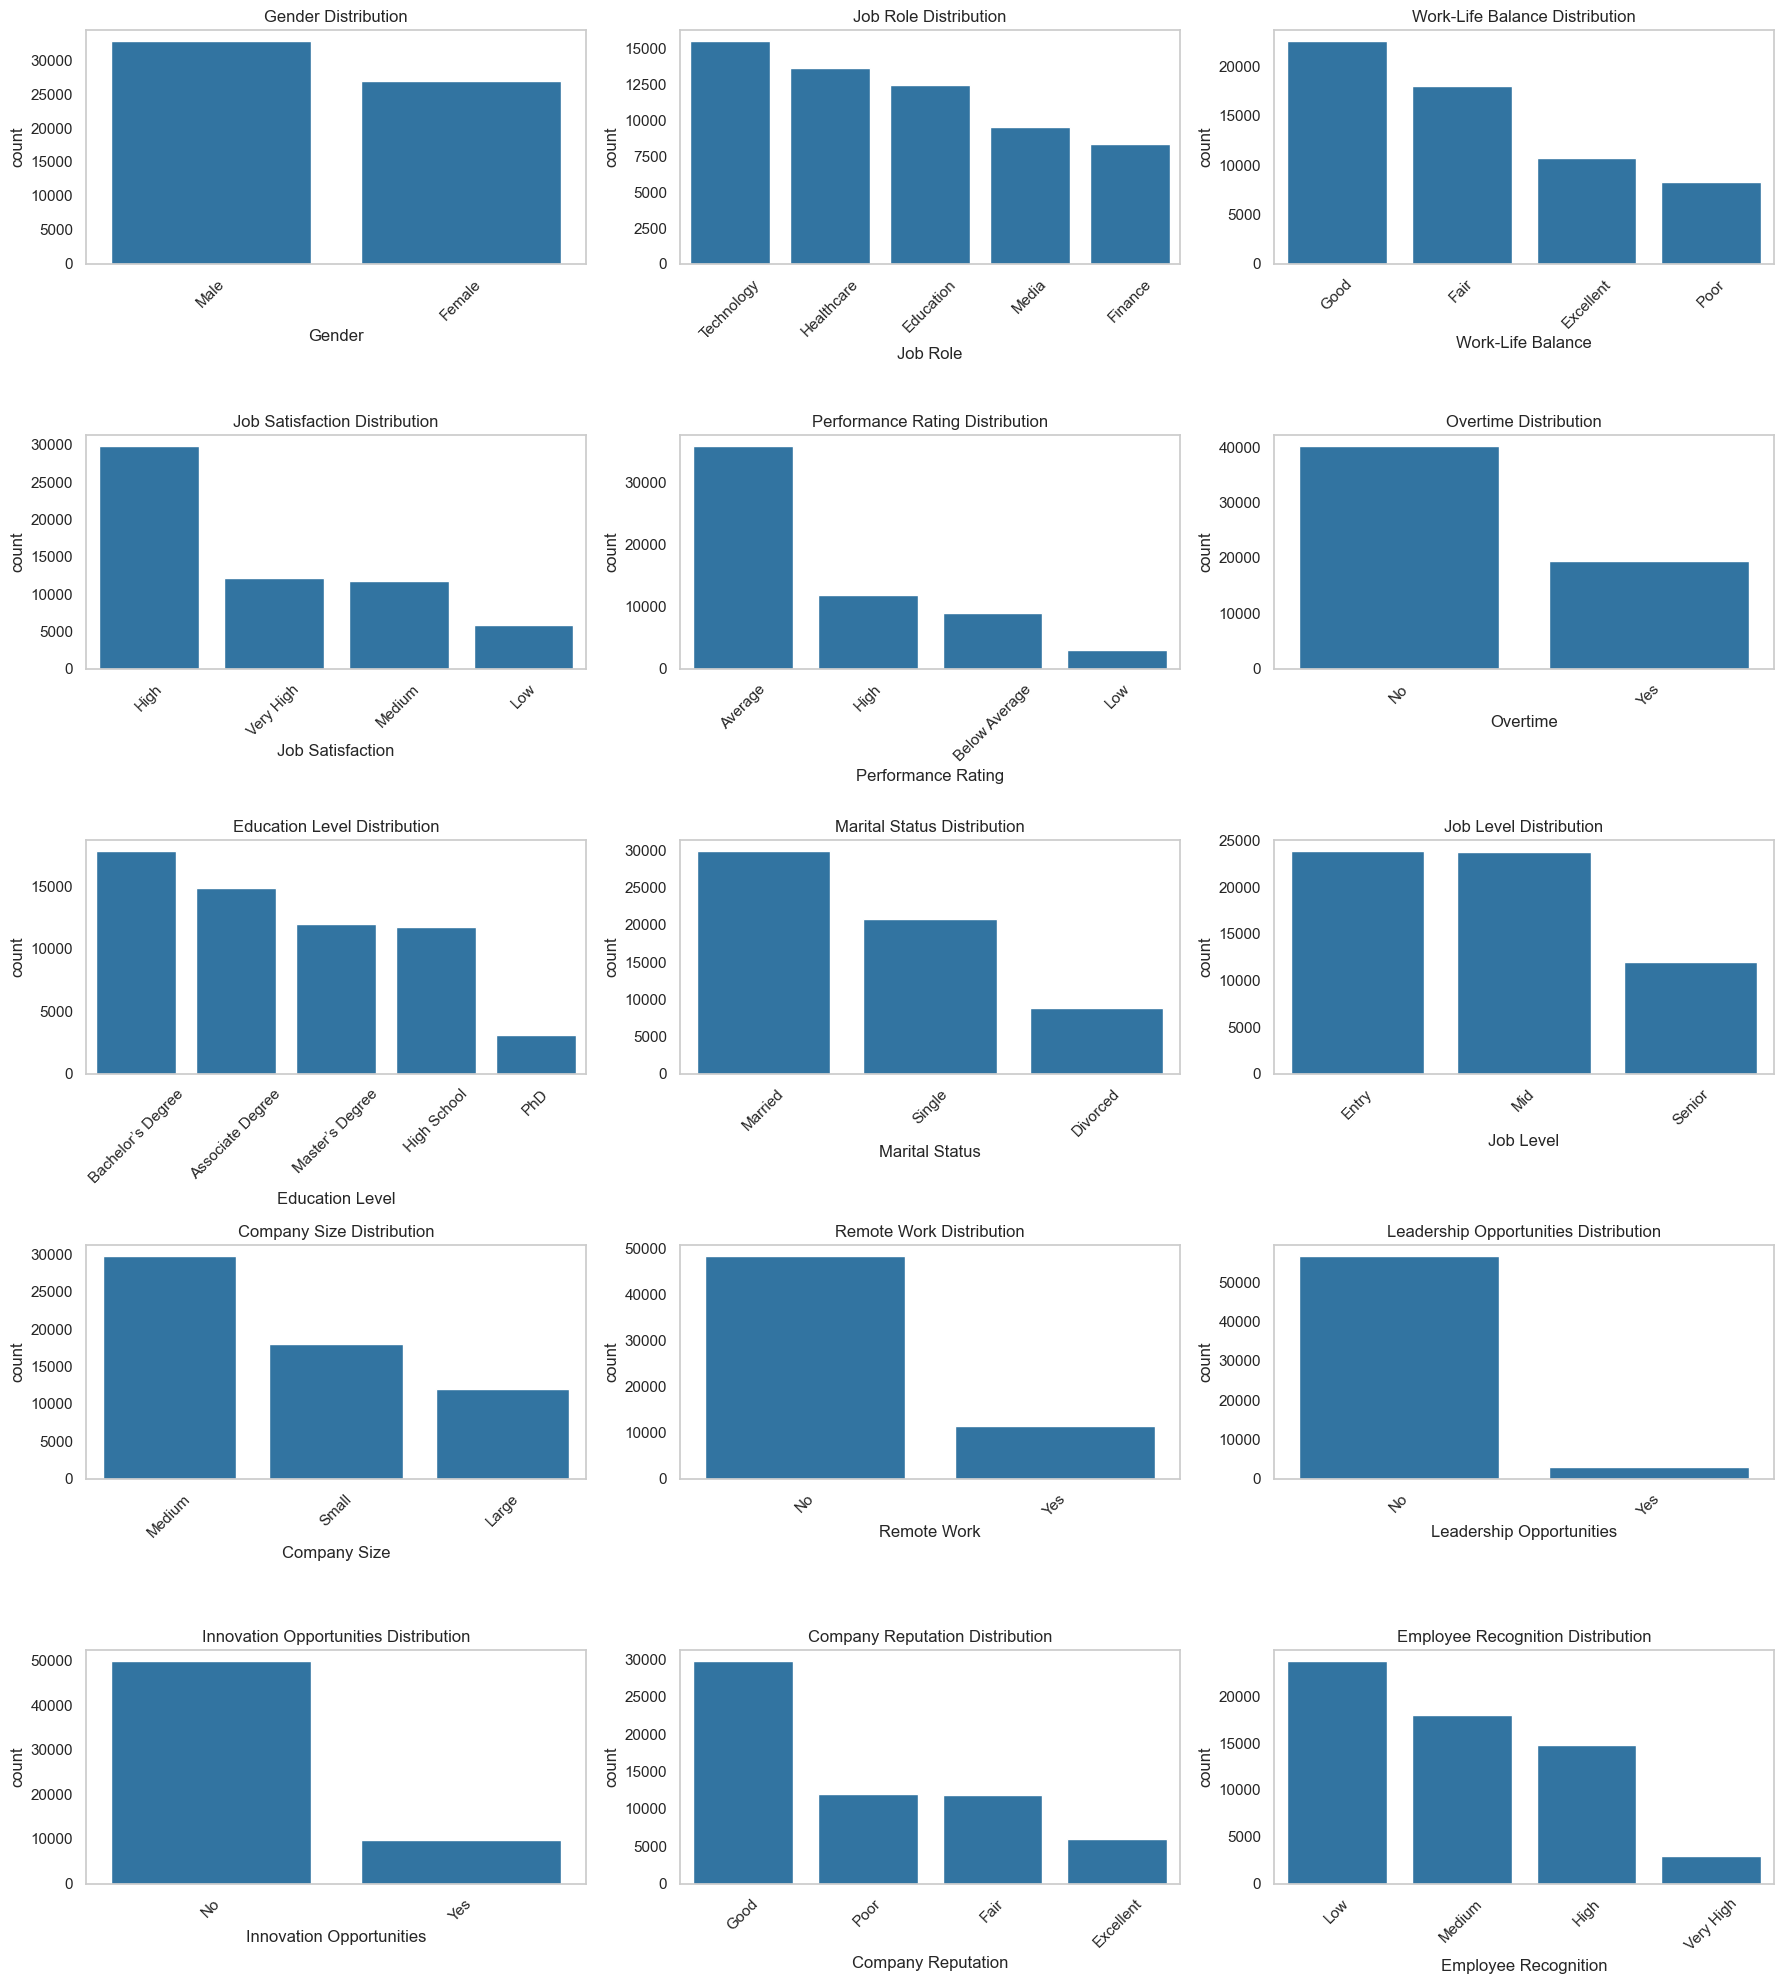

In [12]:
# Bar plots for categorical features
cat_features = ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
                'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
                'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
                'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']

fig, axes = plt.subplots(5, 3, figsize=(18,20))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(data=train_df, x=col, ax=axes[i], order=train_df[col].value_counts().index, color="tab:blue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(False)

plt.tight_layout()
plt.show()


## Bivariate Analysis

### Boxplots (Numerical features vs Attrition)

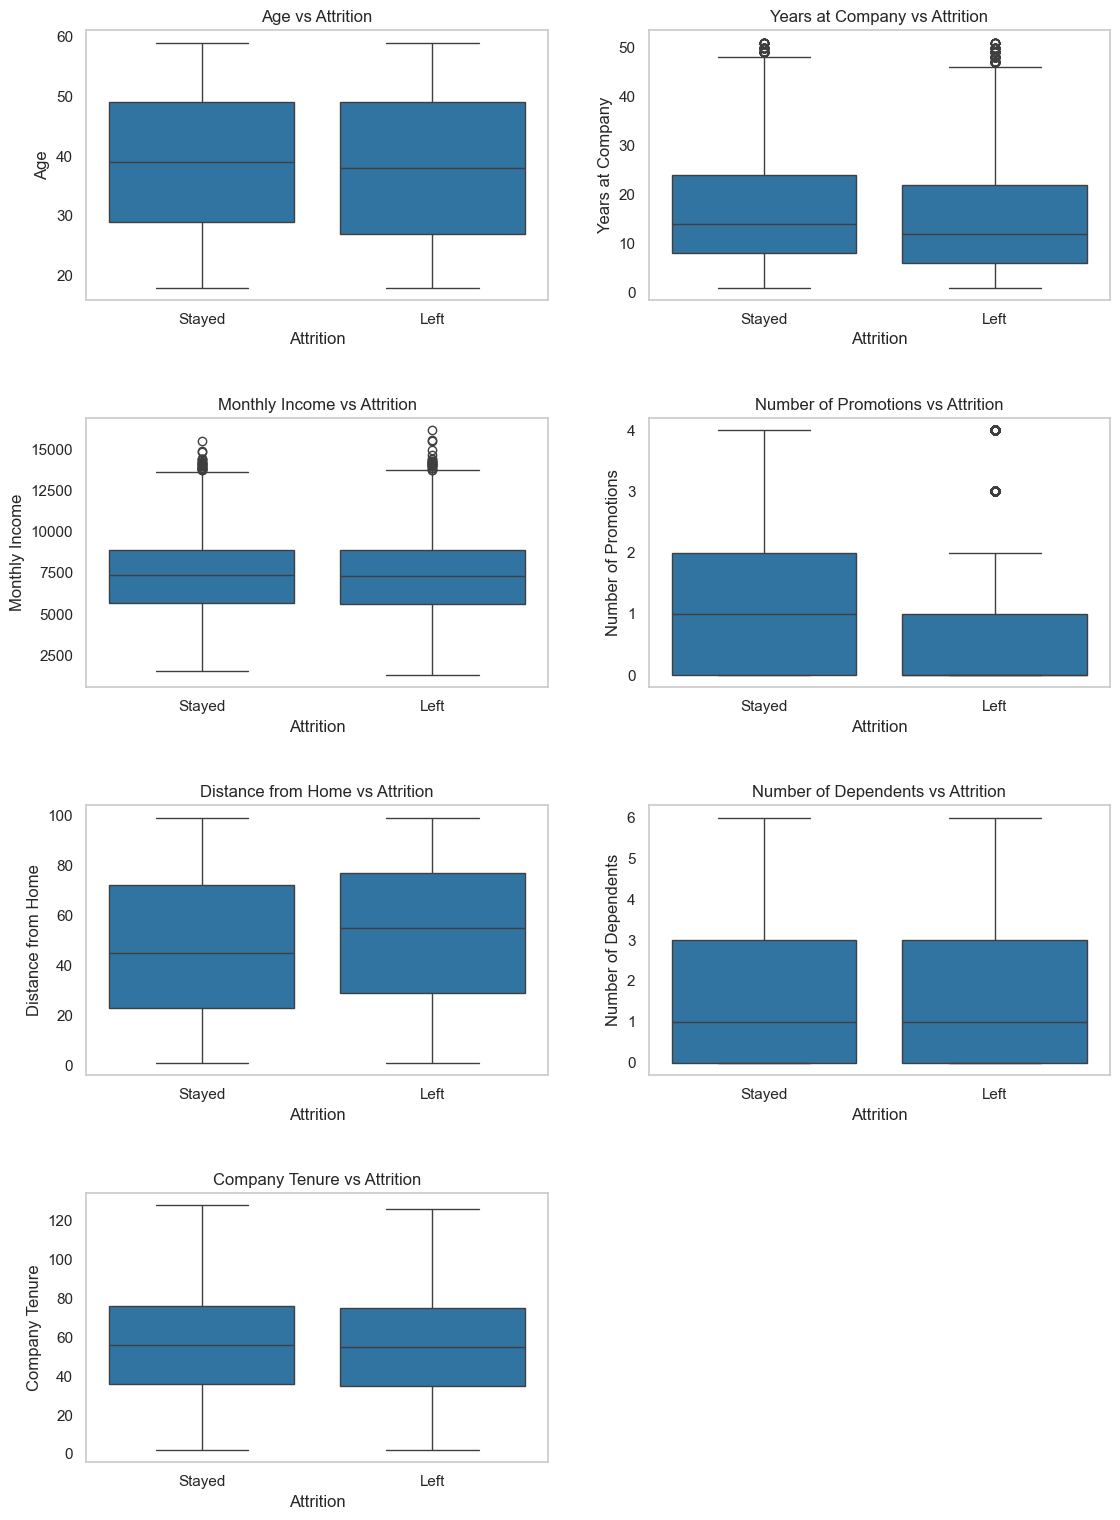

In [13]:
# Boxplots to see differences across attrition
plt.figure(figsize=(12,16))

for i, col in enumerate(num_features, 1):
    plt.subplot(4,2,i)
    sns.boxplot(data=train_df, x="Attrition", y=col, color="tab:blue")
    plt.title(f"{col} vs Attrition")
    plt.grid(False)
    
plt.tight_layout(pad=3)
plt.show()

### Countplots (Categorical features vs Attrition)

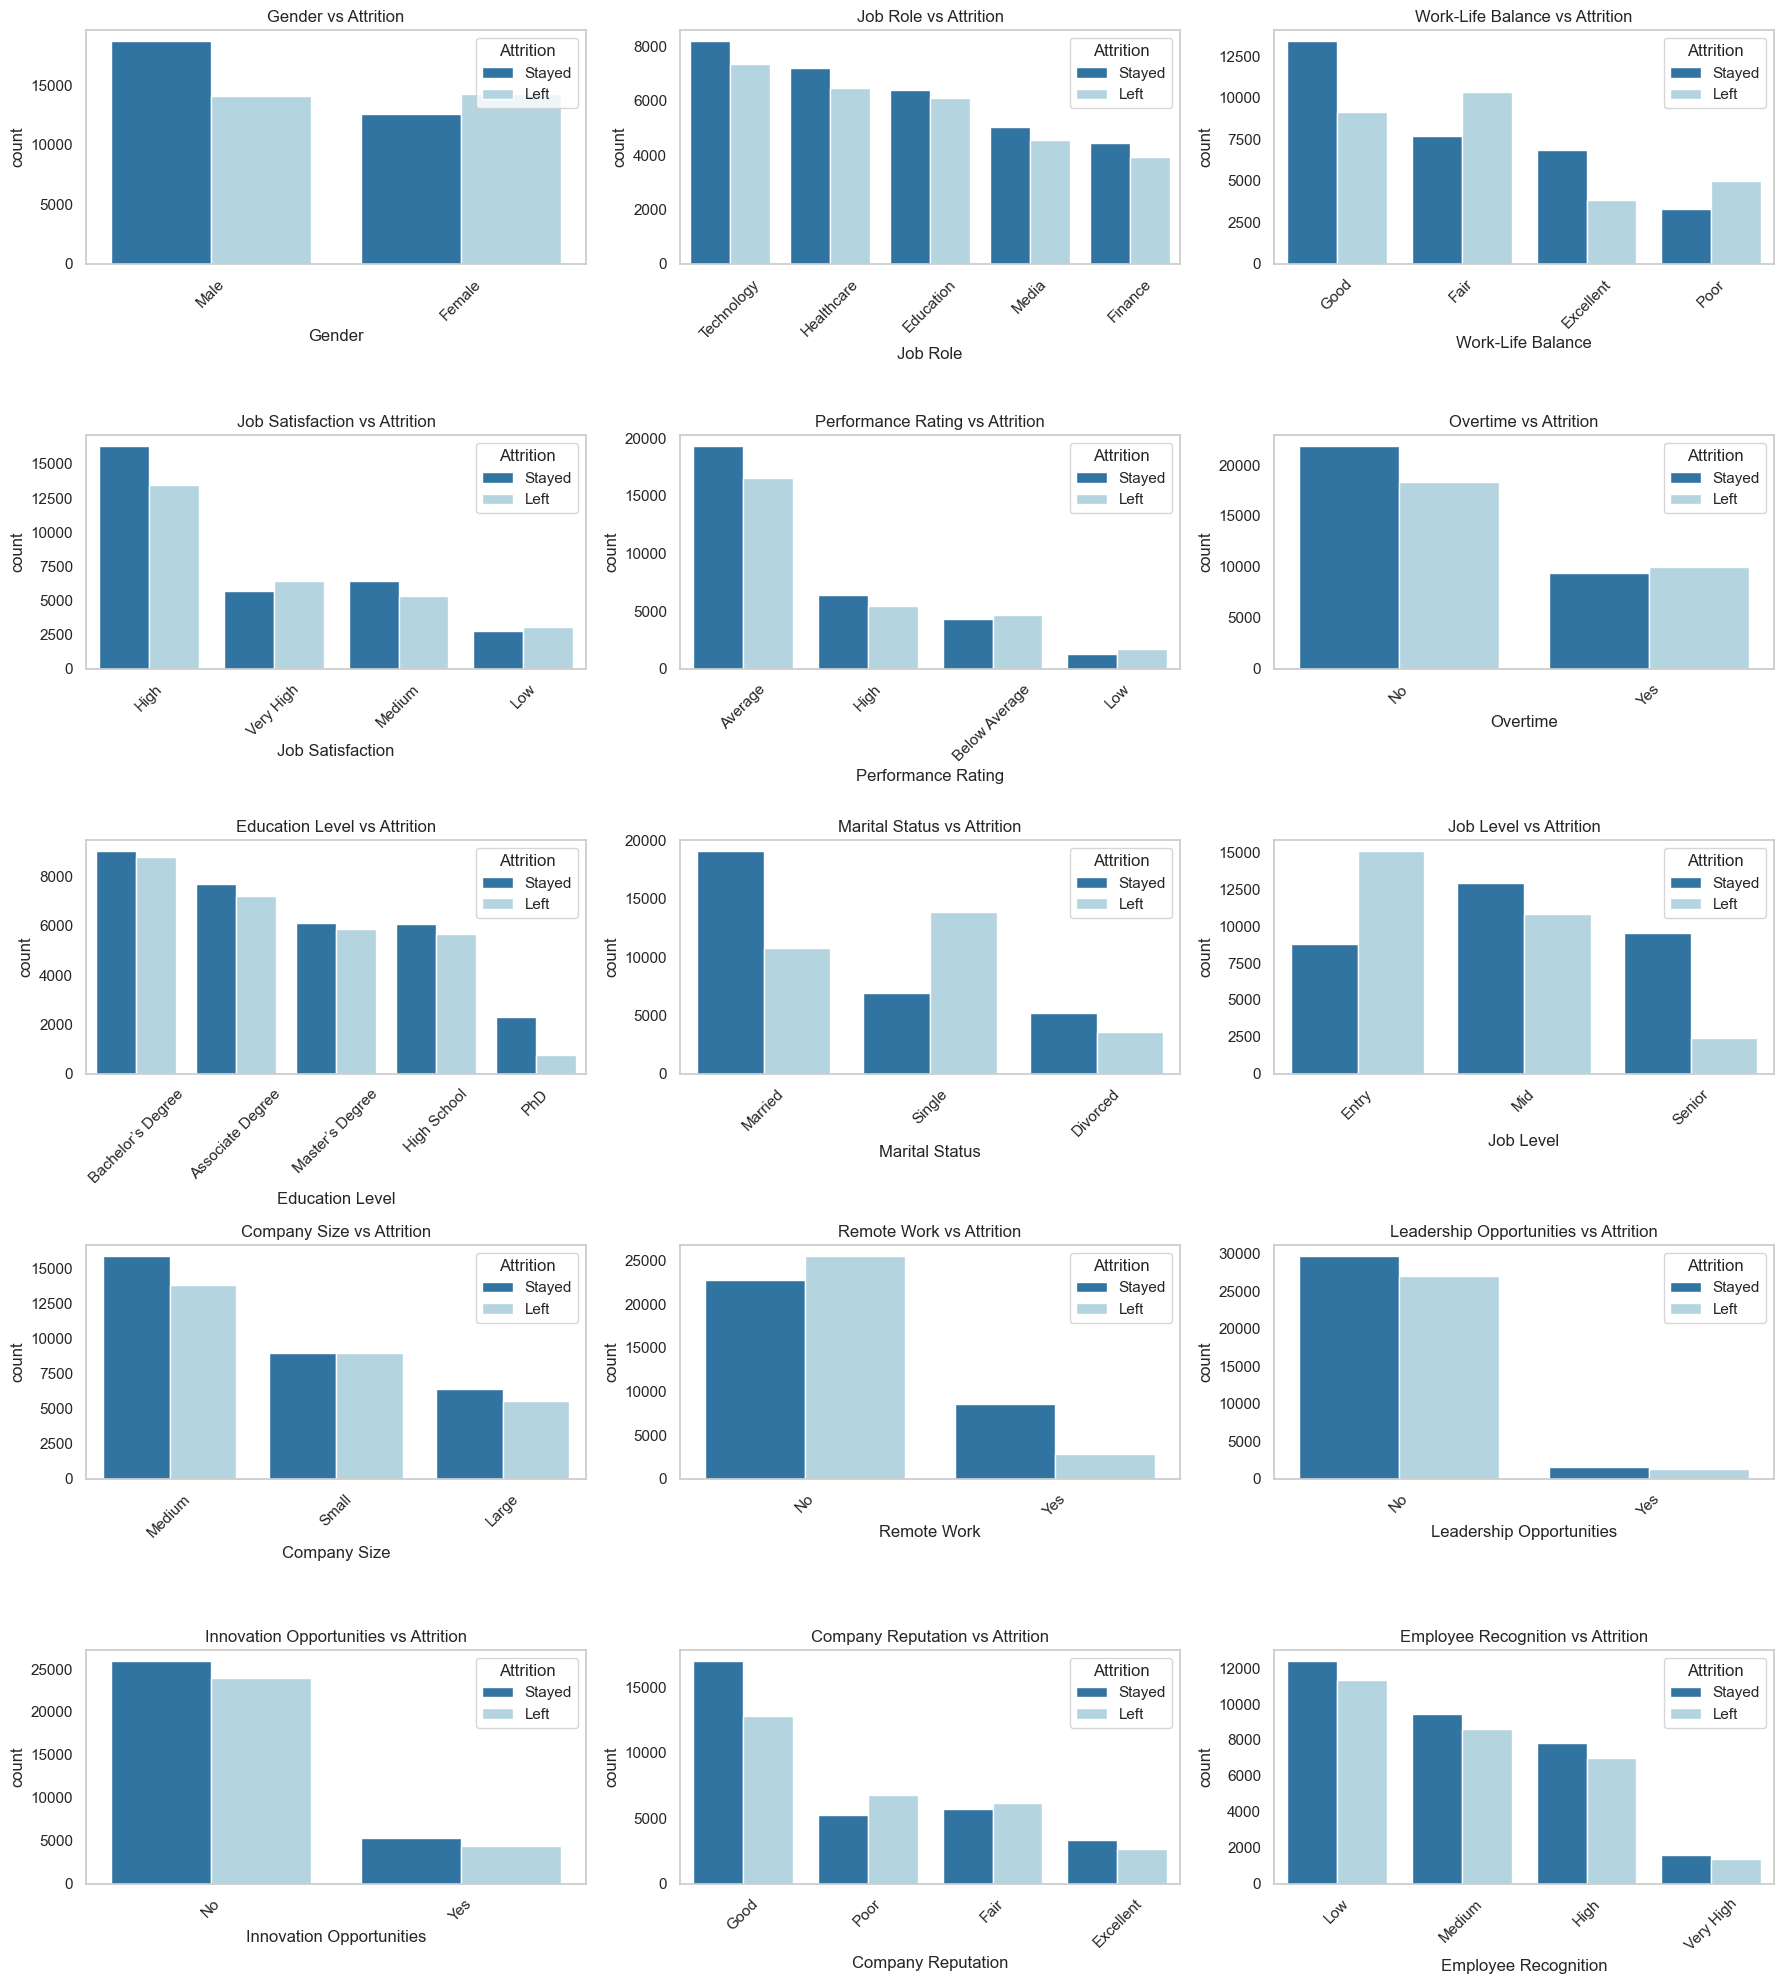

In [14]:
# Compare categorical features with Attrition
fig, axes = plt.subplots(5, 3, figsize=(18,20))
axes = axes.flatten()

custom_palette = ["tab:blue", "lightblue"]
for i, col in enumerate(cat_features):
    sns.countplot(data=train_df, x=col, hue="Attrition", ax=axes[i],
                  order=train_df[col].value_counts().index, palette=custom_palette)
    axes[i].set_title(f"{col} vs Attrition")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(False)

plt.tight_layout()
plt.show()

### Correlation heatmap of Numerial features

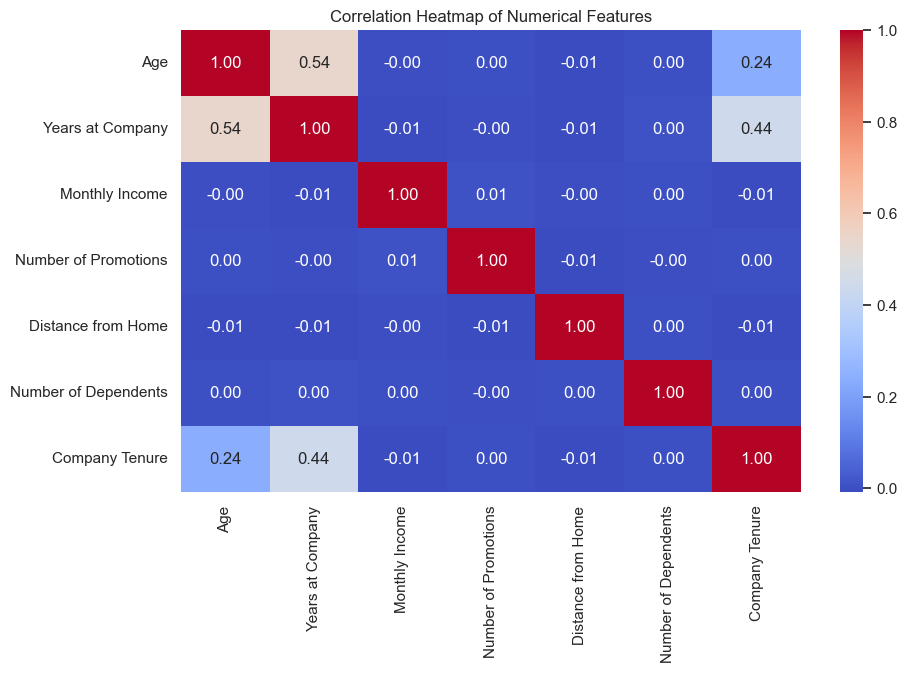

In [15]:
# Correlation heatmap
plt.figure(figsize=(10,6))
corr = train_df[num_features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()